In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HNL_complete as HNL
import pylhe

events_mass_10 = list(pylhe.readLHE('HNL_M (10).lhe')) #contains 10^5 samples
events_mass_70 = list(pylhe.readLHE('HNL_M (70).lhe')) #contains 5*10^4 samples

# Data sorting:

In [2]:
Sample_size = 5*10**4

#Making first data set
Data_set_1 = HNL.sort_data(events_mass_10,Sample_size)

#Making second data set
Data_set_7 = HNL.sort_data(events_mass_70,Sample_size)


Learn_size1 = int(np.ceil(len(Data_set_1[2])*0.8))
Learn_size2 = int(np.ceil(len(Data_set_7[2])*0.8))
#Combining them

Train_data = np.concatenate((Data_set_1[0][:,0:Learn_size1].T,Data_set_7[0][:,0:Learn_size2].T))
Train_M = (np.concatenate((Data_set_1[1][0:Learn_size1],Data_set_7[1][0:Learn_size2])))
Test_data = np.concatenate((Data_set_1[0][:,Learn_size1:].T,Data_set_7[0][:,Learn_size2:].T))

Test_M = (np.concatenate((Data_set_1[1][Learn_size1:],Data_set_7[1][Learn_size2:])))
Train_Energies = np.concatenate((Data_set_1[2][0:Learn_size1],Data_set_7[2][0:Learn_size2]))
Test_Energies = np.concatenate((Data_set_1[2][Learn_size1:],Data_set_7[2][Learn_size2:]))

(61514, 13)
[1389.54130034  108.82939252 1605.83288415 ...  495.25103656 1704.81258395
  197.94662291]


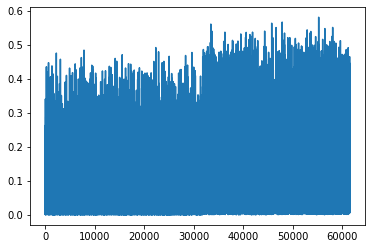

In [3]:
print(Train_data.shape)
print(Train_Energies)

plt.plot((Train_data[:,11]))

In [16]:
from sklearn.neural_network import MLPRegressor

X_train, y_train = (Train_data.T).T,Train_M 

X_test, y_test = (Test_data.T).T, Test_M

Model1 = MLPRegressor(hidden_layer_sizes=(100),activation='relu',max_iter = 100\
                     , learning_rate_init= 0.001, solver = 'adam',batch_size = 200, random_state= 3,warm_start = True,tol = 10**(-8))

In [18]:
Model1.fit(X_train,y_train)

Model1.loss_curve_

[0.0059224217868125905,
 0.00011128869601861173,
 6.581694777829883e-05,
 5.329001773868464e-05,
 4.453929672917367e-05,
 3.776463179649592e-05,
 3.480959111349642e-05,
 3.302385335311524e-05,
 3.131103352167236e-05,
 3.018875739395746e-05,
 2.8960318632790346e-05,
 2.808239777245151e-05,
 2.7313514039507328e-05,
 2.6545172009655652e-05,
 2.6122541682662197e-05,
 2.522064943158348e-05,
 2.4609931425907012e-05,
 2.4333184484769904e-05,
 2.3222935937018316e-05,
 2.29082338583623e-05,
 2.2647506338752687e-05,
 2.257705460771291e-05,
 2.2202761872568833e-05,
 2.178653536512081e-05,
 2.1504701616893554e-05,
 2.1140704562050315e-05,
 2.13030951774706e-05,
 2.0466618954986674e-05,
 2.085058718478152e-05,
 2.0421604923353372e-05,
 2.0229426429982484e-05,
 1.9549178364636868e-05,
 1.984640521011827e-05,
 1.9265477937483873e-05,
 1.961552123777279e-05,
 1.8806878771162262e-05,
 1.9014294800097722e-05,
 1.8909823291454245e-05,
 1.8885604200864047e-05,
 1.8260556027618748e-05,
 1.8661527606597788e

[0.6532157  0.48810924 0.24955196 ... 0.10696037 0.52184632 0.32497777]
[79.58080735 79.3465307  77.24704113 ... 79.57587103 82.8607461
 80.39837239]


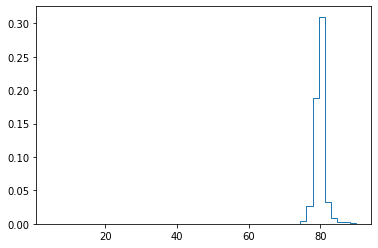

<Figure size 432x288 with 0 Axes>

In [19]:
ypred1 = Model1.predict(Test_data) 
bins = np.linspace(5, 90, 50)

plt.hist((ypred1)*Test_Energies,bins,label='10', histtype='step',density = True)
plt.figure()
print(ypred1)
print(Test_Energies*Test_M)

In [20]:
p1 = [Data_set_1[3][0][Learn_size1:],Data_set_1[3][1][Learn_size1:],Data_set_1[3][2][Learn_size1:],Data_set_1[3][3][Learn_size1:]]
p2 = [Data_set_1[4][0][Learn_size1:],Data_set_1[4][1][Learn_size1:],Data_set_1[4][2][Learn_size1:],Data_set_1[4][3][Learn_size1:]]
q =[Data_set_1[5][0][Learn_size1:],Data_set_1[5][1][Learn_size1:],Data_set_1[5][2][Learn_size1:],Data_set_1[5][3][Learn_size1:]]


p1_7 = [Data_set_7[3][0][Learn_size2:],Data_set_7[3][1][Learn_size2:],Data_set_7[3][2][Learn_size2:],Data_set_7[3][3][Learn_size2:]]
p2_7 = [Data_set_7[4][0][Learn_size2:],Data_set_7[4][1][Learn_size2:],Data_set_7[4][2][Learn_size2:],Data_set_7[4][3][Learn_size2:]]
q_7 =[Data_set_7[5][0][Learn_size2:],Data_set_7[5][1][Learn_size2:],Data_set_7[5][2][Learn_size2:],Data_set_7[5][3][Learn_size2:]]



In [21]:
nlist = np.array([])
y = HNL.find(p1,p2,q,(((ypred1)*Test_Energies)[:int(0.2*Learn_size1/0.8)]))
pT = (p1[1]+p2[1]+q[1])**2+(p1[2]+p2[2]+q[2])**2
E = p1[0]+p2[0]+q[0]
ew1 = E+ np.sqrt(y[0][0]**2+pT)
ew2 = E + np.sqrt(y[1][0]**2+pT)

pl = y[0][0]


def func(ew1,ew2,pz1,pz2,p1):
    y1 = ((ew1+p1[0])**2-p1[1]**2-p1[2]**2-(pz1+p1[3])**2)
    y2 = ((ew2+p1[0])**2-p1[1]**2-p1[2]**2-(pz2+p1[3])**2)
    return [y1,y2]

pwL1 =y[0][0] + p1[3]+p2[3]+q[3]
pwL2 = y[1][0]+ p1[3]+p2[3]+q[3]
z = func(ew1,ew2,pwL1,pwL2,p1)

for i in range(len(y[0][1])):
    if z[0][i] <= z[1][i]:
        nlist = np.append(nlist,y[1][1][i])
    else:
        nlist = np.append(nlist,y[0][1][i])

        
y2 = HNL.find(p1_7,p2_7,q_7,((ypred1)*Test_Energies)[int(0.2*Learn_size1/0.8):])       
pl2 = y2[0][0]

pT = (p1_7[1]+p2_7[1]+q_7[1])**2+(p1_7[2]+p2_7[2]+q_7[2])**2
E = p1_7[0]+p2_7[0]+q_7[0]
ew1 = E+ np.sqrt(y2[0][0]**2+pT)
ew2 = E + np.sqrt(y2[1][0]**2+pT)
pwL1 = y2[0][0] + p1_7[3]+p2_7[3]+q_7[3]
pwL2 = y2[1][0]+ p1_7[3]+p2_7[3]+q_7[3]
z = func(ew1,ew2,pwL1,pwL2,p1_7)

for i in range(len(y2[0][1])):
    if z[0][i] <= z[1][i]:
        nlist = np.append(nlist,y2[1][1][i])
    else:
        nlist = np.append(nlist,y2[0][1][i])



C:\Users\rasat\Desktop\Python LHE\HNL_complete.py:71: RuntimeWarning: invalid value encountered in sqrt
  pLn = (-a*pL+ np.sqrt(d))/(pL**2-E**2)
C:\Users\rasat\Desktop\Python LHE\HNL_complete.py:72: RuntimeWarning: invalid value encountered in sqrt
  alt_pLn = (-a*pL- np.sqrt(d))/(pL**2-E**2)
C:\Users\rasat\Desktop\Python LHE\HNL_complete.py:75: RuntimeWarning: invalid value encountered in sqrt
  massn = np.sqrt(m**2 - 2*(pw[0]*p1[0]-pw[3]*p1[3]))
C:\Users\rasat\Desktop\Python LHE\HNL_complete.py:76: RuntimeWarning: invalid value encountered in sqrt
  alt_massn = np.sqrt(m**2 - 2*(alt_pw[0]*p1[0]-alt_pw[3]*p1[3]))


<Figure size 432x288 with 0 Axes>

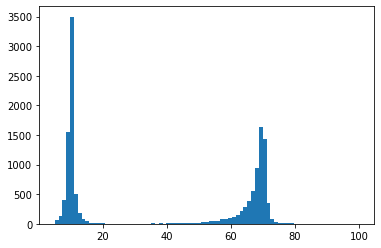

<Figure size 432x288 with 0 Axes>

In [22]:
bins = np.linspace(5, 100, 80)

plt.hist(nlist,bins)
plt.figure()